# Mini-Proyecto END2END: Predicción de Ventas de Videojuegos 👾


Este proyecto tiene como objetivo desarrollar un modelo de regresión para predecir las ventas globales de videojuegos utilizando un dataset que contiene información sobre diversos aspectos de los juegos, como la plataforma, el año de lanzamiento, el género y el publisher. El análisis sigue un flujo de trabajo completo de principio a fin (END2END), que abarca la carga y exploración inicial de los datos, el preprocesamiento necesario para limpiar y preparar las variables para el modelado, la selección y entrenamiento de un modelo de regresión lineal, la evaluación del rendimiento del modelo utilizando métricas relevantes y, finalmente, la realización de una predicción para un registro aleatorio. El objetivo principal es comprender la relación entre las diferentes características de los videojuegos y su éxito comercial a nivel global, así como demostrar la aplicación de técnicas de aprendizaje automático para la predicción de ventas.

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

## 1. Carga y Exploración del Dataset

En esta sección, cargaremos el dataset que contiene información sobre las ventas de videojuegos y realizaremos una exploración inicial para familiarizarnos con los datos, entender su estructura, los tipos de variables que contiene y las posibles características relevantes para nuestro objetivo de predicción.

A continuación, cargamos el dataset utilizando la librería Pandas y mostramos las primeras filas para tener una idea del contenido.

In [12]:
import pandas as pd

df = pd.read_csv('1/vgsales.csv')

print(df.head())

df.info()

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

La función `info()` nos proporciona un resumen del dataset, incluyendo el número de filas, columnas, los tipos de datos de cada columna y la cantidad de valores no nulos.

In [31]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.416134,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781686,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


El método `describe()` ofrece estadísticas descriptivas de las columnas numéricas, como la media, la desviación estándar, los valores mínimo y máximo, y los percentiles. Esto nos ayuda a entender la distribución y la escala de estas variables.

In [30]:
df.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_1C Company,Publisher_20th Century Fox Video Games,Publisher_2D Boy,Publisher_3DO,Publisher_49Games,Publisher_505 Games,Publisher_5pb,Publisher_7G//AMES,Publisher_989 Sports,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASC Games,Publisher_ASCII Entertainment,Publisher_ASCII Media Works,Publisher_ASK,Publisher_Abylight,Publisher_Acclaim Entertainment,Publisher_Accolade,Publisher_Ackkstudios,Publisher_Acquire,Publisher_Activision,Publisher_Activision Blizzard,Publisher_Activision Value,Publisher_Adeline Software,Publisher_Aerosoft,Publisher_Agatsuma Entertainment,Publisher_Agetec,Publisher_Aksys Games,Publisher_Alawar Entertainment,Publisher_Alchemist,Publisher_Alternative Software,Publisher_Altron,Publisher_Alvion,Publisher_American Softworks,Publisher_Angel Studios,Publisher_Answer Software,Publisher_Aqua Plus,Publisher_Aques,Publisher_Arc System Works,Publisher_Arena Entertainment,Publisher_Aria,Publisher_Arika,Publisher_ArtDink,Publisher_Aruze Corp,Publisher_Ascaron Entertainment,Publisher_Ascaron Entertainment GmbH,Publisher_Asgard,Publisher_Asmik Ace Entertainment,Publisher_Asmik Corp,Publisher_Aspyr,Publisher_Astragon,Publisher_Asylum Entertainment,Publisher_Atari,Publisher_Athena,Publisher_Atlus,Publisher_Avalon Interactive,Publisher_Avanquest,Publisher_Avanquest Software,Publisher_Axela,Publisher_BAM! Entertainment,Publisher_BMG Interactive Entertainment,Publisher_BPS,Publisher_Banpresto,Publisher_Benesse,Publisher_Berkeley,Publisher_Bethesda Softworks,Publisher_Big Ben Interactive,Publisher_Big Fish Games,Publisher_Bigben Interactive,Publisher_Black Bean Games,Publisher_Black Label Games,Publisher_Blast! Entertainment Ltd,Publisher_Blue Byte,Publisher_Bohemia Interactive,Publisher_Bomb,Publisher_Boost On,Publisher_Brash Entertainment,Publisher_Broccoli,Publisher_BushiRoad,Publisher_CBS Electronics,Publisher_CCP,Publisher_CDV Software Entertainment,Publisher_CPG Products,Publisher_CTO SpA,Publisher_Capcom,Publisher_Cave,Publisher_ChunSoft,Publisher_City Interactive,Publisher_Cloud Imperium Games Corporation,Publisher_Coconuts Japan,Publisher_Codemasters,Publisher_Codemasters Online,Publisher_CokeM Interactive,Publisher_Coleco,Publisher_Comfort,Publisher_Commseed,Publisher_Compile,Publisher_Compile Heart,Publisher_Conspiracy Entertainment,Publisher_Core Design Ltd.,Publisher_Crave Entertainment,Publisher_Creative Core,Publisher_Crimson Cow,Publisher_Crystal Dynamics,Publisher_Culture Brain,Publisher_Culture Publishers,Publisher_CyberFront,Publisher_Cygames,Publisher_D3Publisher,Publisher_DHM Interactive,Publisher_DSI Games,Publisher_DTP Entertainment,Publisher_Daedalic,Publisher_Daedalic Entertainment,Publisher_Daito,Publisher_Data Age,Publisher_Data Design Interactive,Publisher_Data 

Para comprender mejor la distribución de las variables categóricas, utilizamos `value_counts()` para ver la frecuencia de cada categoría en algunas de las columnas clave como 'Platform', 'Genre' y 'Publisher'. Esto nos da una idea de la representación de cada categoría en el dataset.

## 1.1. Histogramas

Análisis de las distribuciones de las variables numéricas

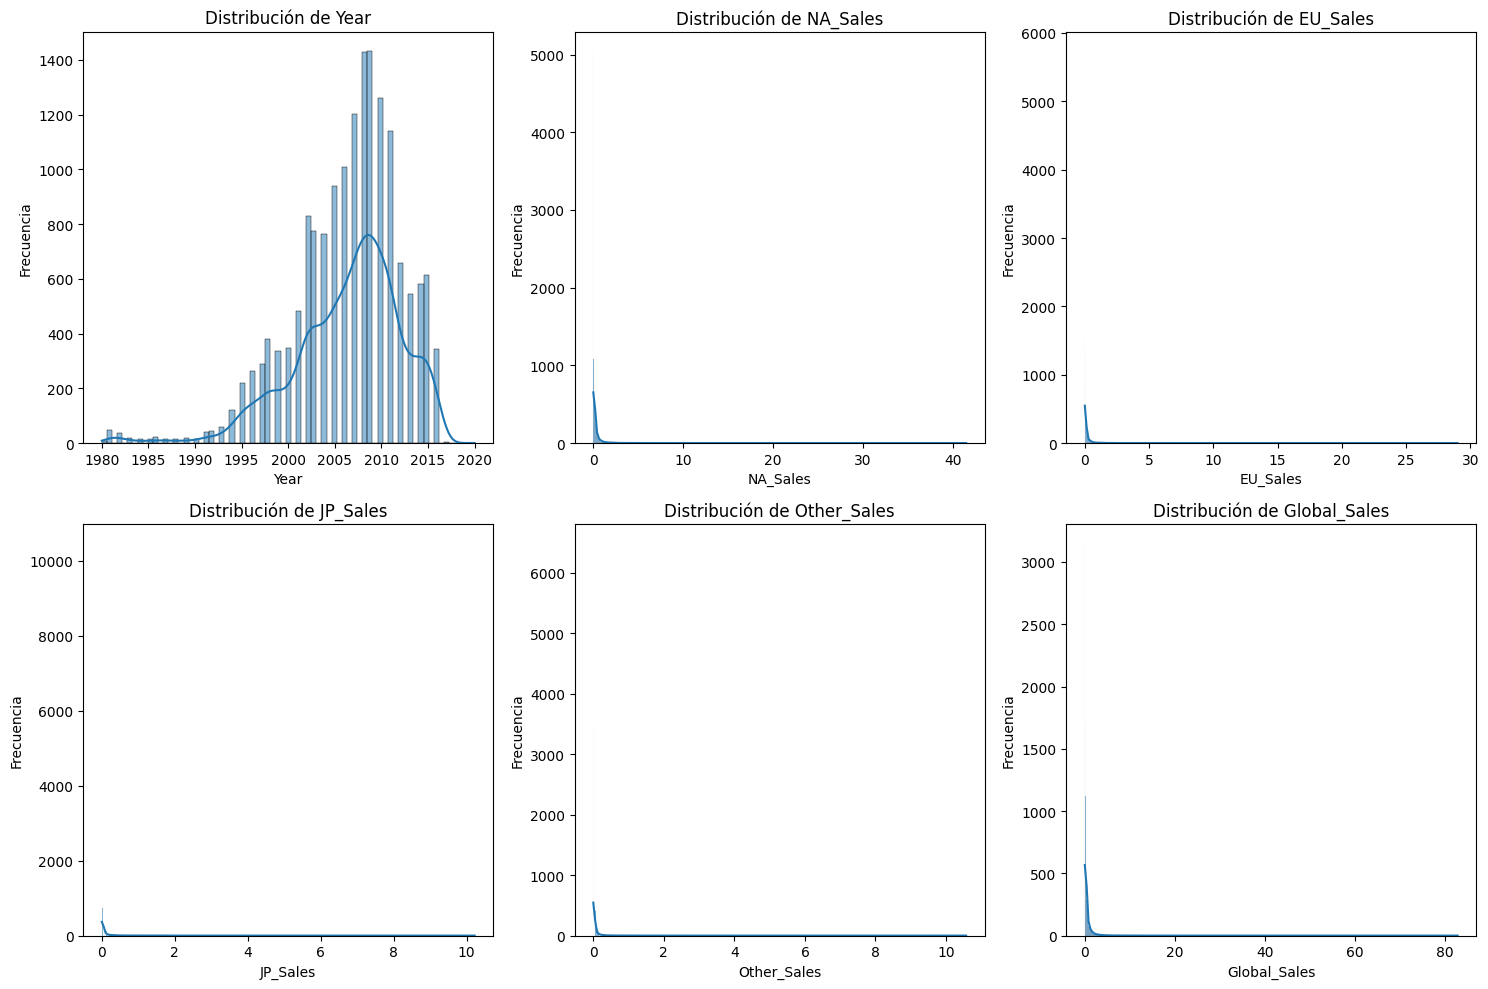

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas para las que queremos ver la distribución
numerical_cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Creamos una figura con subplots para cada columna
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)  # 2 filas, 3 columnas, posición i+1
    sns.histplot(df[col], kde=True)  # kde=True para mostrar una estimación de densidad del kernel
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()  # Ajusta los subplots para que no se superpongan
plt.show()

Conclusiones iniciales de las distribuciones:

Year: Muestra una tendencia creciente en el lanzamiento de videojuegos a lo largo del tiempo, con un pico alrededor de los años 2000-2010, seguido de un descenso. Esto podría reflejar tendencias de la industria.


Ventas (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales): Todas estas variables muestran una fuerte asimetría positiva (sesgo a la derecha). Esto es típico en datos de ventas donde pocos productos alcanzan un éxito masivo. La mayoría de los juegos tienen ventas modestas en comparación con los "superventas".

## 1.2. Gráfico de barras

Análisis de las variables categoricas

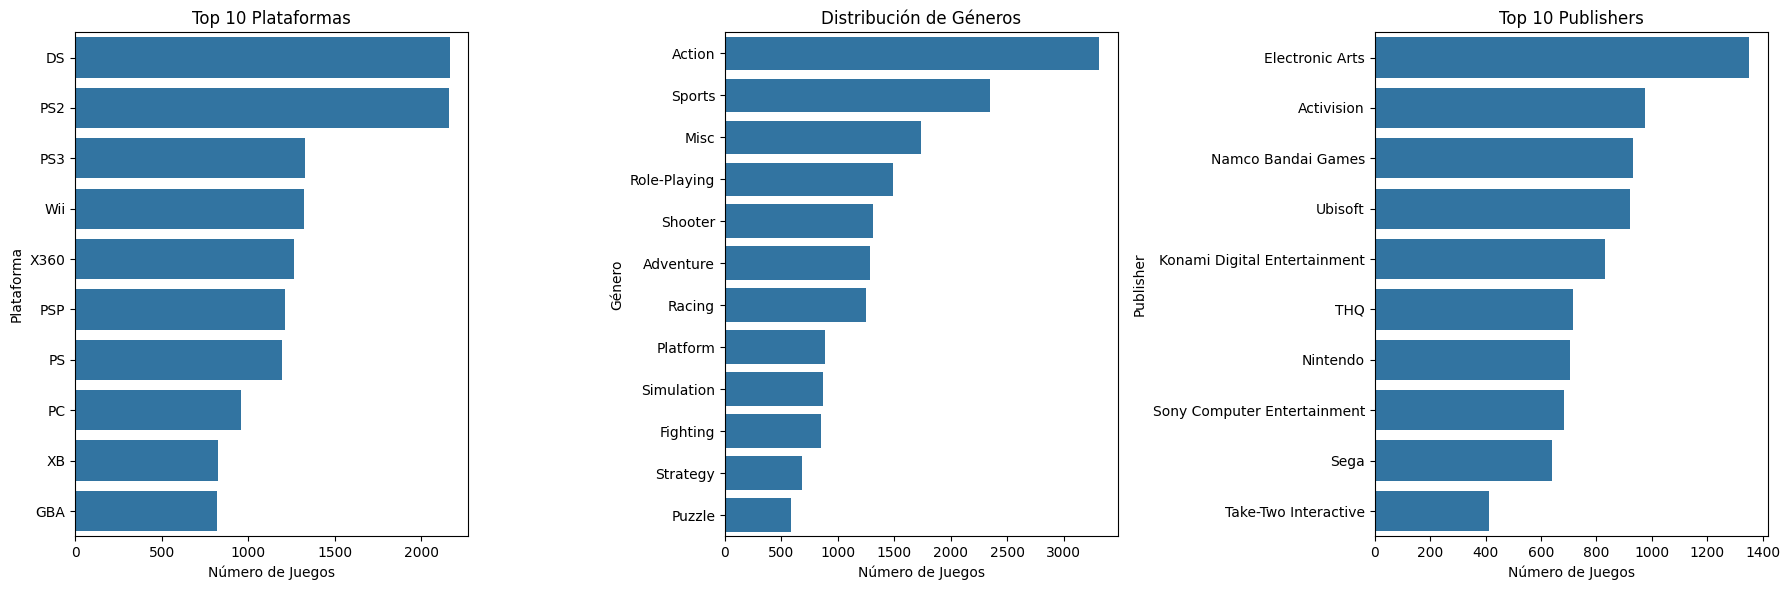

In [14]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(y='Platform', data=df, order=df['Platform'].value_counts().index[:10])
plt.title('Top 10 Plataformas')
plt.xlabel('Número de Juegos')
plt.ylabel('Plataforma')

plt.subplot(1, 3, 2)
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Distribución de Géneros')
plt.xlabel('Número de Juegos')
plt.ylabel('Género')

plt.subplot(1, 3, 3)
# Para Publisher, vamos a mostrar solo los 10 más frecuentes para evitar un gráfico ilegible
top_publishers = df['Publisher'].value_counts().index[:10]
sns.countplot(y='Publisher', data=df, order=top_publishers)
plt.title('Top 10 Publishers')
plt.xlabel('Número de Juegos')
plt.ylabel('Publisher')

plt.tight_layout()
plt.show()

Plataformas: La lista de las plataformas más comunes refleja una época pasada de la industria de los videojuegos. La ausencia de consolas más recientes como PS4, PS5, Xbox One, Xbox Series X/S o Nintendo Switch sugiere que los datos se recopilaron principalmente hasta principios de la década de 2010. Esto es una información importante a tener en cuenta al interpretar los resultados y al pensar en la generalización del modelo a datos más actuales.

Géneros: La distribución de géneros parece bastante equilibrada, con "Action" y "Sports" a la cabeza, seguidos de cerca por otros géneros populares. Esta diversidad de géneros podría ser útil para predecir las ventas, ya que es probable que diferentes géneros tengan diferentes patrones de ventas.

Publishers: La presencia de grandes publishers como Electronic Arts, Activision y Nintendo en el top 10 indica que estos actores importantes de la industria tienen una gran cantidad de títulos en el dataset. La influencia del publisher podría ser un factor a considerar en la predicción de ventas.

## 1.3. Boxplot para ventas globales

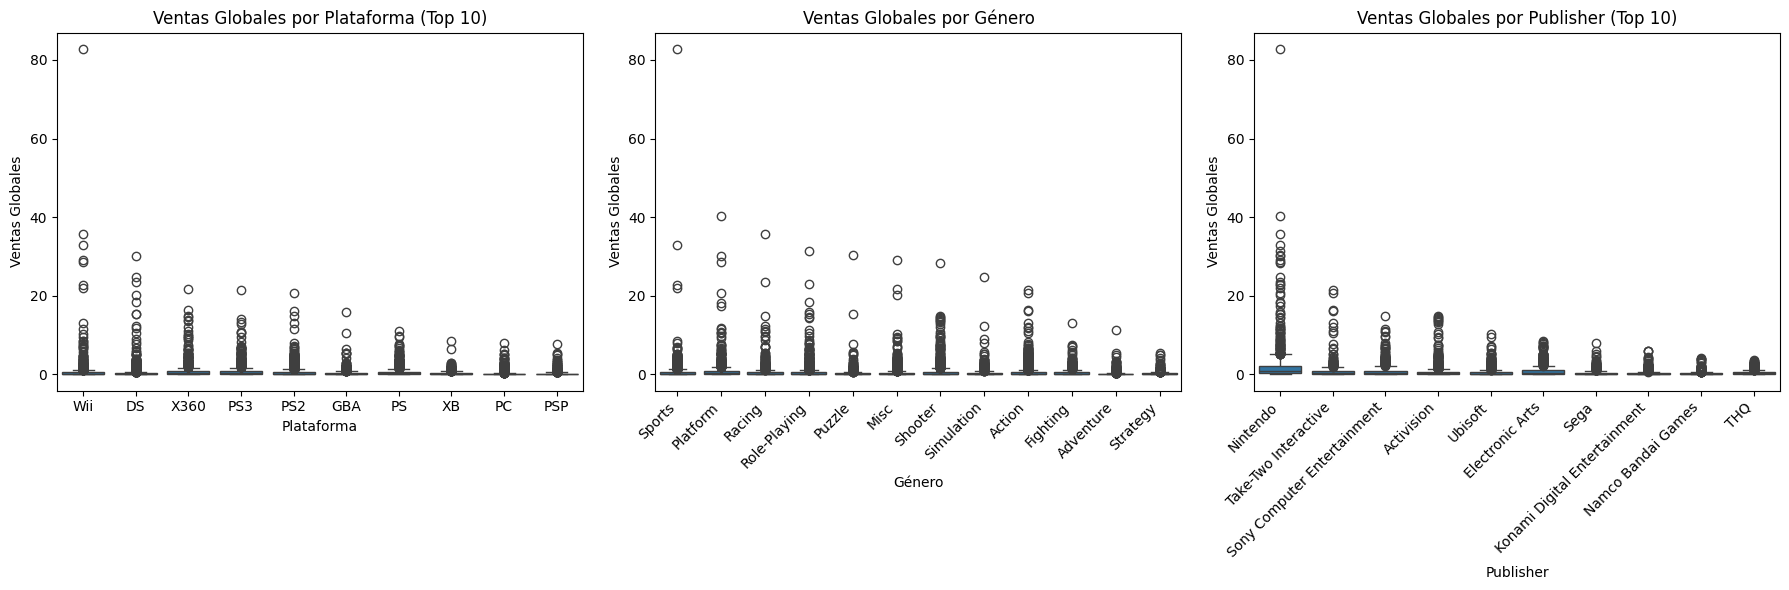

In [15]:
plt.figure(figsize=(18, 6))

# Diagrama de caja para Platform vs Global_Sales (top 10 plataformas)
top_platforms = df['Platform'].value_counts().index[:10]
plt.subplot(1, 3, 1)
sns.boxplot(x='Platform', y='Global_Sales', data=df[df['Platform'].isin(top_platforms)])
plt.title('Ventas Globales por Plataforma (Top 10)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')

# Diagrama de caja para Genre vs Global_Sales
plt.subplot(1, 3, 2)
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.title('Ventas Globales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas para mejor legibilidad

# Diagrama de caja para Publisher vs Global_Sales (top 10 publishers)
top_publishers = df['Publisher'].value_counts().index[:10]
plt.subplot(1, 3, 3)
sns.boxplot(x='Publisher', y='Global_Sales', data=df[df['Publisher'].isin(top_publishers)])
plt.title('Ventas Globales por Publisher (Top 10)')
plt.xlabel('Publisher')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas para mejor legibilidad

plt.tight_layout()
plt.show()

Sports: Muestra una mediana de ventas globales relativamente alta, aunque con una dispersión considerable y varios valores atípicos altos. Esto sugiere que, en promedio, los juegos de deportes tienden a vender bien, pero también hay algunos éxitos masivos y muchos con ventas más modestas.


Platform: También presenta una mediana de ventas alta y valores atípicos significativos, como mencioné antes.


Shooter y Role-Playing: Mantienen una mediana de ventas decente.


Géneros como Action, Racing, Misc, Simulation, Fighting, Adventure, Strategy y Puzzle parecen tener medianas de ventas más bajas en comparación con "Sports" y "Platform".

## 2. Valores nulos

In [17]:
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


### 2.1. Manejo de Valores Nulos

En esta etapa del preprocesamiento, abordamos los valores faltantes identificados en nuestro dataset. Según el análisis inicial con df.info(), encontramos valores nulos en las columnas Year y Publisher.

Columna 'Year':

Se decidió imputar los valores nulos en la columna Year utilizando la mediana de los años presentes en el dataset. La mediana es una medida de tendencia central robusta a los valores atípicos, lo que la convierte en una opción adecuada para evitar que valores extremos influyan demasiado en la imputación. El objetivo de la imputación es preservar la mayor cantidad de datos posible, ya que la eliminación de filas con años faltantes podría llevar a la pérdida de información valiosa para el modelo de regresión.
Columna 'Publisher':

Para la columna categórica Publisher, optamos por crear una nueva categoría llamada "Unknown" para los valores faltantes. Esta estrategia tiene la ventaja de no introducir sesgos al reemplazar los valores nulos con la moda (el publisher más frecuente). Además, la ausencia de información del publisher podría ser en sí misma una característica relevante para el modelo. Al crear una categoría explícita para los valores faltantes, permitimos que el modelo aprenda potencialmente de esta ausencia de información.
Tras aplicar estas técnicas de manejo de valores nulos, verificamos que las columnas Year y Publisher ya no contengan valores faltantes, asegurando así un dataset más completo para las etapas posteriores de preprocesamiento y modelado.

In [18]:
# Imputar los valores nulos en 'Year' con la mediana
median_year = df['Year'].median()
df['Year'].fillna(median_year, inplace=True)

# Imputar los valores nulos en 'Publisher' con la categoría 'Unknown'
df['Publisher'].fillna('Unknown', inplace=True)

# Verificar que ya no hay valores nulos en estas columnas
print(df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


<ipython-input-18-fa5185497a97>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(median_year, inplace=True)
<ipython-input-18-fa5185497a97>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

## 3. Codificación de las variables categóricas (Platform, Genre, Publisher) utilizando one-hot encoding

Los modelos de regresión lineal requieren entradas numéricas, por lo que necesitamos convertir las variables categóricas ('Platform', 'Genre', 'Publisher') a un formato numérico. Utilizaremos la técnica de **one-hot encoding** para crear variables binarias (dummy variables) para cada categoría única en estas columnas. El argumento `drop_first=True` se utiliza para evitar la multicolinealidad.

In [19]:
# Aplicar one-hot encoding a las columnas 'Platform', 'Genre' y 'Publisher'
df = pd.get_dummies(df, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)

# Mostrar las primeras filas del DataFrame con las columnas codificadas
print(df.head())

# Mostrar la información del DataFrame para ver los nuevos tipos de datos y la cantidad de columnas
df.info()

   Rank                      Name    Year  NA_Sales  EU_Sales  JP_Sales  \
0     1                Wii Sports  2006.0     41.49     29.02      3.77   
1     2         Super Mario Bros.  1985.0     29.08      3.58      6.81   
2     3            Mario Kart Wii  2008.0     15.85     12.88      3.79   
3     4         Wii Sports Resort  2009.0     15.75     11.01      3.28   
4     5  Pokemon Red/Pokemon Blue  1996.0     11.27      8.89     10.22   

   Other_Sales  Global_Sales  Platform_3DO  Platform_3DS  ...  \
0         8.46         82.74         False         False  ...   
1         0.77         40.24         False         False  ...   
2         3.31         35.82         False         False  ...   
3         2.96         33.00         False         False  ...   
4         1.00         31.37         False         False  ...   

   Publisher_Zushi Games  Publisher_bitComposer Games  \
0                  False                        False   
1                  False                    

## 4. A continuacion... se eliminara la columna "Name".

A primera vista, el nombre de un videojuego podría parecer una característica importante, ya que algunos nombres de franquicias o juegos individuales son muy populares y podrían estar asociados con mayores ventas.

Sin embargo, para utilizar la columna Name directamente en un modelo de regresión lineal de la manera en que lo hemos planteado hasta ahora (con codificación numérica), se requeriría un procesamiento adicional significativo, como el análisis de texto. Tendríamos que extraer características relevantes de los nombres, como la presencia de ciertas palabras clave, la longitud del nombre, o incluso utilizar técnicas más avanzadas como TF-IDF o word embeddings.

In [20]:
df = df.drop('Name', axis=1)

print(df.head())

df.info()

   Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0     1  2006.0     41.49     29.02      3.77         8.46         82.74   
1     2  1985.0     29.08      3.58      6.81         0.77         40.24   
2     3  2008.0     15.85     12.88      3.79         3.31         35.82   
3     4  2009.0     15.75     11.01      3.28         2.96         33.00   
4     5  1996.0     11.27      8.89     10.22         1.00         31.37   

   Platform_3DO  Platform_3DS  Platform_DC  ...  Publisher_Zushi Games  \
0         False         False        False  ...                  False   
1         False         False        False  ...                  False   
2         False         False        False  ...                  False   
3         False         False        False  ...                  False   
4         False         False        False  ...                  False   

   Publisher_bitComposer Games  Publisher_dramatic create  Publisher_fonfun  \
0                  

# 5. Modelo de regresión lineal múltiple

La Regresión Lineal Múltiple es un modelo que asume una relación lineal entre las variables independientes y la variable dependiente. Entrenaremos este modelo utilizando el conjunto de entrenamiento para aprender los coeficientes que mejor se ajustan a los datos.

In [21]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo (y) y las variables predictoras (X)
X = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento (X): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X): (13278, 624)
Tamaño del conjunto de prueba (X): (3320, 624)
Tamaño del conjunto de entrenamiento (y): (13278,)
Tamaño del conjunto de prueba (y): (3320,)


## 5.1. Entrenamiento del modelo

In [22]:
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de Regresión Lineal
linear_model = LinearRegression()

# Entrenar el modelo utilizando el conjunto de entrenamiento
linear_model.fit(X_train, y_train)

print("Modelo de Regresión Lineal entrenado.")

Modelo de Regresión Lineal entrenado.


## 5.2. Evaluación del modelo

Utilizaremos varias métricas comunes para evaluar modelos de regresión:

Error Cuadrático Medio (Mean Squared Error - MSE): Mide el promedio de los cuadrados de los errores (la diferencia entre el valor predicho y el valor real). Un valor más bajo indica un mejor ajuste.

Raíz del Error Cuadrático Medio (Root Mean Squared Error - RMSE): Es la raíz cuadrada del MSE. Tiene las mismas unidades que la variable objetivo, lo que facilita la interpretación.

Error Absoluto Medio (Mean Absolute Error - MAE): Mide el promedio de las magnitudes de los errores (la diferencia absoluta entre el valor predicho y el valor real). También es fácil de interpretar.

Coeficiente de Determinación (R²): Representa la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor 1  cercano a 1 indica un buen ajuste.


Los resultados de la evaluación del modelo de Regresión Lineal son los siguientes:

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Hacer predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados de la evaluación
print("Resultados de la evaluación del modelo de Regresión Lineal:")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

Resultados de la evaluación del modelo de Regresión Lineal:
Error Cuadrático Medio (MSE): 0.00
Raíz del Error Cuadrático Medio (RMSE): 0.01
Error Absoluto Medio (MAE): 0.00
Coeficiente de Determinación (R²): 1.00


### 5.3. Gráfico de Dispersión: Comparación entre Ventas Globales Reales y Predichas

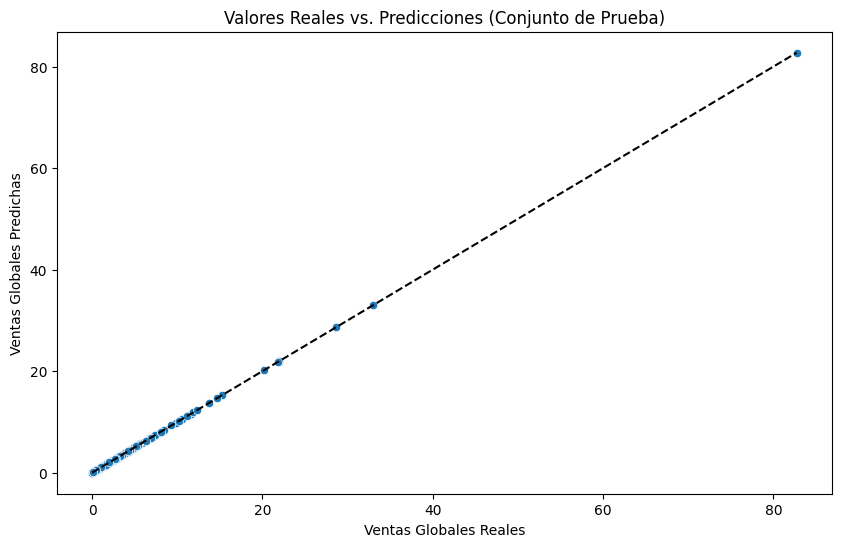

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # Línea diagonal para referencia
plt.xlabel('Ventas Globales Reales')
plt.ylabel('Ventas Globales Predichas')
plt.title('Valores Reales vs. Predicciones (Conjunto de Prueba)')
plt.show()

In [25]:
# Mostrar las primeras filas de X
print("Primeras filas de X:")
print(X.head())

# Mostrar las columnas de X
print("\nColumnas de X:")
print(X.columns.tolist())

Primeras filas de X:
   Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Platform_3DO  \
0     1  2006.0     41.49     29.02      3.77         8.46         False   
1     2  1985.0     29.08      3.58      6.81         0.77         False   
2     3  2008.0     15.85     12.88      3.79         3.31         False   
3     4  2009.0     15.75     11.01      3.28         2.96         False   
4     5  1996.0     11.27      8.89     10.22         1.00         False   

   Platform_3DS  Platform_DC  Platform_DS  ...  Publisher_Zushi Games  \
0         False        False        False  ...                  False   
1         False        False        False  ...                  False   
2         False        False        False  ...                  False   
3         False        False        False  ...                  False   
4         False        False        False  ...                  False   

   Publisher_bitComposer Games  Publisher_dramatic create  Publisher_fonfun  \
0   

## 5.4. Predicción de Registros Aleatorios

Para tener una idea más concreta del rendimiento del modelo a nivel individual, seleccionaremos un registro aleatorio del conjunto de prueba y veremos cuál es la predicción de nuestro modelo para ese registro, comparándola con el valor real.

Seleccionamos un registro aleatorio del conjunto de prueba, obtenemos sus características y realizamos una predicción con el modelo entrenado. También recuperamos el valor real de las ventas globales para este registro.


In [26]:
import random

# Seleccionar un índice aleatorio del conjunto de prueba
random_index = random.choice(X_test.index)

# Obtener las características del registro aleatorio
random_record = X_test.loc[[random_index]]

# Hacer la predicción para este registro
predicted_sales = linear_model.predict(random_record)[0]

# Obtener el valor real de las ventas globales para este registro
actual_sales = y_test.loc[random_index]

# Imprimir la información
print("Predicción de un registro aleatorio del conjunto de prueba:")
print("\nCaracterísticas del registro:")
print(random_record)
print(f"\nVentas Globales Predichas: {predicted_sales:.2f}")
print(f"Ventas Globales Reales: {actual_sales:.2f}")

Predicción de un registro aleatorio del conjunto de prueba:

Características del registro:
      Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Platform_3DO  \
8126  8128  1999.0       0.1      0.07       0.0         0.01         False   

      Platform_3DS  Platform_DC  Platform_DS  ...  Publisher_Zushi Games  \
8126         False        False        False  ...                  False   

      Publisher_bitComposer Games  Publisher_dramatic create  \
8126                        False                      False   

      Publisher_fonfun  Publisher_iWin  Publisher_id Software  \
8126             False           False                  False   

      Publisher_imageepoch Inc.  Publisher_inXile Entertainment  \
8126                      False                           False   

      Publisher_mixi, Inc  Publisher_responDESIGN  
8126                False                   False  

[1 rows x 624 columns]

Ventas Globales Predichas: 0.18
Ventas Globales Reales: 0.18


## 📌 Mas predicciones

In [33]:
import random
import pandas as pd

# Número de predicciones a realizar
num_predictions = 5

print(f"Realizando {num_predictions} predicciones aleatorias del conjunto de prueba:\n")

for _ in range(num_predictions):
    # Seleccionar un índice aleatorio del conjunto de prueba
    random_index = random.choice(X_test.index)

    # Obtener las características del registro aleatorio
    random_record = X_test.loc[[random_index]]

    # Hacer la predicción para este registro
    predicted_sales = linear_model.predict(random_record)[0]

    # Obtener el valor real de las ventas globales para este registro
    actual_sales = y_test.loc[random_index]

    # Imprimir la información
    print(f"Índice del registro: {random_index}")
    print(f"  Ventas Globales Predichas: {predicted_sales:.2f}")
    print(f"  Ventas Globales Reales: {actual_sales:.2f}\n")

Realizando 5 predicciones aleatorias del conjunto de prueba:

Índice del registro: 4826
  Ventas Globales Predichas: 0.39
  Ventas Globales Reales: 0.40

Índice del registro: 12877
  Ventas Globales Predichas: 0.05
  Ventas Globales Reales: 0.05

Índice del registro: 15762
  Ventas Globales Predichas: 0.02
  Ventas Globales Reales: 0.02

Índice del registro: 15593
  Ventas Globales Predichas: 0.02
  Ventas Globales Reales: 0.02

Índice del registro: 8807
  Ventas Globales Predichas: 0.15
  Ventas Globales Reales: 0.15



## 6. Conclusiones y Análisis Final

En este proyecto, hemos desarrollado un modelo de regresión lineal para predecir las ventas globales de videojuegos. Tras realizar la carga, exploración y preprocesamiento de los datos, el modelo fue entrenado y evaluado en un conjunto de prueba.

Los resultados de la evaluación mostraron un rendimiento sorprendentemente alto, con un Coeficiente de Determinación (R²) cercano a 1 y valores muy bajos para el Error Cuadrático Medio (MSE), la Raíz del Error Cuadrático Medio (RMSE) y el Error Absoluto Medio (MAE). La gráfica de dispersión de los valores reales contra los predichos también sugiere una fuerte correlación y una alta precisión en las predicciones para el conjunto de prueba.

Si bien estos resultados indican un muy buen ajuste del modelo a los datos de prueba, es importante ser cauteloso y considerar posibles explicaciones para un rendimiento tan perfecto. Podría ser que las relaciones entre las variables predictoras y la variable objetivo en este dataset, después del preprocesamiento, sean excepcionalmente lineales.

Es importante recordar que este dataset parece ser relativamente antiguo, lo que podría limitar la generalización del modelo a videojuegos más recientes. Además, aunque exploramos la columna 'Name', decidimos no incluirla directamente en el modelo debido a su alta cardinalidad y la necesidad de técnicas más avanzadas para su procesamiento.

Como posibles pasos futuros, se podría explorar el rendimiento de otros modelos de regresión más complejos (como Random Forest o Gradient Boosting), realizar una ingeniería de características más exhaustiva (incluyendo un posible análisis de la columna 'Name'), y considerar la obtención de datos más recientes para evaluar la capacidad de generalización del modelo en el tiempo.

# ¿Sirve este modelo para que otras personas puedan hacer predicciones?

Directamente, tal como está ahora, este modelo tiene limitaciones para que otras personas hagan predicciones precisas de sus propios videojuegos.

Limitaciones del Modelo Actual para Predicciones Externas:

Entrenamiento con Datos Específicos: Este modelo se entrenó con un dataset particular de ventas de videojuegos que abarca principalmente juegos hasta principios de la década de 2010. Las tendencias del mercado de videojuegos, las plataformas populares y los géneros con mayor éxito han evolucionado significativamente desde entonces. Un juego lanzado en 2025 podría tener dinámicas de ventas muy diferentes a las de un juego de 2006, por ejemplo.


Dependencia de las Características del Dataset: El modelo aprendió las relaciones entre las ventas globales y las características presentes en el dataset: Platform, Year, Genre, y Publisher. Para que alguien más pudiera usar este modelo, necesitarían tener datos de sus propios videojuegos exactamente en el mismo formato y con las mismas columnas (después del preprocesamiento, esto incluye las variables codificadas con one-hot encoding y las variables numéricas escaladas).


Falta de Generalización a Nuevas Plataformas, Géneros o Publishers: Si un videojuego nuevo se lanza en una plataforma que no estaba presente en el dataset de entrenamiento (por ejemplo, PlayStation 5 o Nintendo Switch), o pertenece a un subgénero muy nuevo, el modelo no tendría información previa para hacer una predicción confiable. Lo mismo ocurre con publishers que no estaban en nuestro conjunto de datos.


No Considera Factores Externos Clave: Este modelo actual no tiene en cuenta muchos factores cruciales que influyen en el éxito de un videojuego, como:

- Calidad del juego y reseñas: La recepción crítica y del público son predictores importantes de ventas.


- Marketing y publicidad: Una campaña de marketing exitosa puede impulsar significativamente las ventas.


- Precio: El precio de venta afecta directamente la cantidad de unidades vendidas y los ingresos.


- Competencia: El lanzamiento de juegos similares al mismo tiempo puede afectar las ventas.


- Tendencias del mercado y modas: Ciertos tipos de juegos o mecánicas pueden ser más populares en diferentes momentos.


- Influencia de streamers y creadores de contenido.


Naturaleza Estática del Modelo: El modelo que se entrenó es estático. No se actualiza con nueva información del mercado.



Para que un modelo sea útil para predicciones externas de nuevos videojuegos, se necesitaría:

Un dataset de entrenamiento mucho más amplio y actualizado: Que incluya datos de juegos más recientes y las plataformas y géneros actuales.

Ingeniería de características más sofisticada: Incorporar variables que capturen la calidad del juego (quizás a través de análisis de texto de reseñas), la inversión en marketing (si se dispusiera de esos datos), el precio, etc.

Un modelo más complejo: Quizás un modelo de aprendizaje automático más avanzado que pueda capturar mejor las relaciones no lineales y las interacciones complejas entre las variables.

Posibilidad de ingresar nuevas categorías: El modelo debería poder manejar plataformas, géneros o publishers que no vio durante el entrenamiento (aunque esto es un desafío).

Reentrenamiento periódico: El modelo debería ser reentrenado con datos nuevos para mantenerse al día con las tendencias del mercado.